### Assignment 10 - Spectral Clustering

### By Sourita Nag and Sarah Ruckman

In [1]:
import torch
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import torchvision
from torchvision.io import read_image
import torchvision.transforms as T
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds

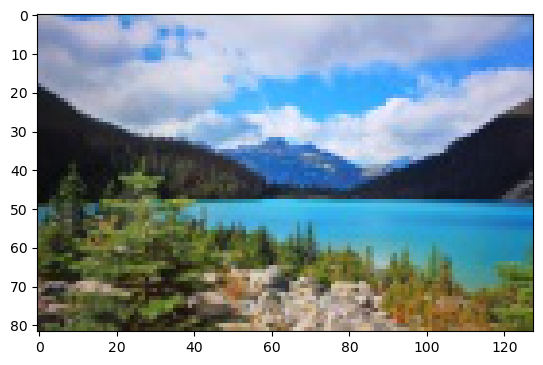

In [2]:
img = read_image('C:/Users/Sourita Nag/Downloads/scene2.jpg')

#Viewing the image
tensor_image_np = img.permute(1, 2, 0).numpy()  # Convert tensor to NumPy array and permute dimensions
plt.imshow(tensor_image_np)

img.shape
img = img.permute(1,2,0)
img.shape

#normalizing the image
img_norm = img/255
img_norm.shape
m,n,c = img_norm.shape

In [3]:
img = torch.reshape(img_norm,(-1,3))
img.shape

torch.Size([10496, 3])

In [4]:
#Computing the affinity matrix
sigma2 = 0.1**2
diff = img.unsqueeze(1) - img.unsqueeze(0)
diff.shape

affinity_matrix = torch.exp((-1*torch.sum((diff**2),dim = 2))/sigma2)
affinity_matrix.shape

affinity_matrix.fill_diagonal_(0)

affinity_matrix.shape

torch.Size([10496, 10496])

In [5]:
#From scratch
W = affinity_matrix.clone()
#Degree matrix
D = (torch.sum(affinity_matrix,dim = 1))
D = D.reshape(D.shape[0],1)
#L matrix
D_inv_sqrt = (1/torch.sqrt(D))
D_inv_sqrt.shape
D_inv_sqrt
D_inv = torch.diag(D_inv_sqrt.reshape(-1))
D_inv.shape
D_sparse = csr_matrix(D_inv)
W_sparse = csr_matrix(W)
DWD = D_sparse.dot(W_sparse).dot(D_sparse)
#svd
u,s,vh = svds(DWD,k=30)

### Part a with 10 clusters

In [6]:
idx = np.argsort(s)[::-1]
idx
U1 = u[:,idx]
U1.shape

#Fitting Kmeans to it
n_clusters = 10  
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(U1[:, 1:n_clusters])
labels = kmeans.labels_

C:\Users\Sourita Nag\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [7]:
labels.shape
labels

array([0, 0, 0, ..., 9, 9, 9])

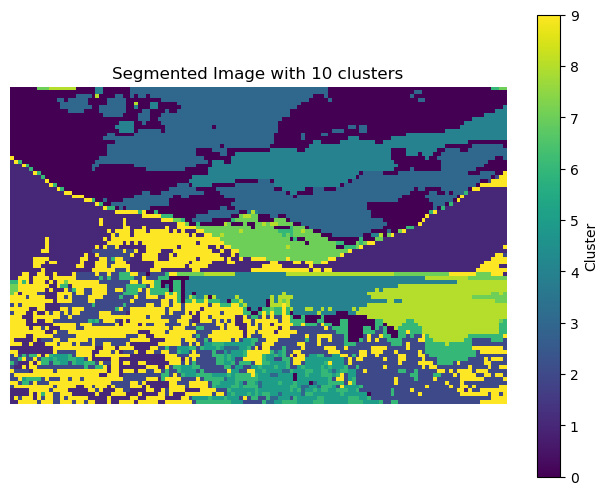

In [8]:
np.unique(labels)
labels_img = np.reshape(labels,(m,n))
plt.figure(figsize=(8, 6))
plt.imshow(labels_img, cmap='viridis')
plt.title('Segmented Image with 10 clusters')
plt.colorbar(label='Cluster')
plt.axis('off')
plt.show()

### Part b Placing in the clusters the means

In [9]:
data_new = img_norm.reshape(-1,3)
data_new.shape

n_clusters = 10
cluster_means = []
for i in range(n_clusters):
    cluster_pixels = data_new[labels == i]
    means = torch.mean(cluster_pixels,dim = 0)
    cluster_means.append(means)
cluster_means

[tensor([0.5857, 0.6798, 0.8255]),
 tensor([0.1121, 0.1202, 0.1307]),
 tensor([0.4562, 0.4379, 0.2349]),
 tensor([0.7787, 0.8184, 0.9098]),
 tensor([0.2794, 0.6758, 0.9321]),
 tensor([0.7381, 0.6688, 0.5861]),
 tensor([0.4712, 0.5436, 0.4841]),
 tensor([0.1844, 0.4020, 0.6560]),
 tensor([0.1790, 0.5862, 0.7513]),
 tensor([0.2704, 0.2925, 0.1892])]

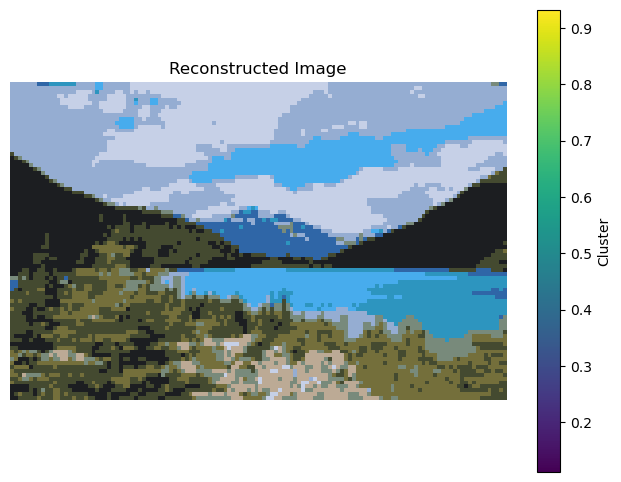

In [10]:
new_image = torch.zeros(data_new.shape)
new_image.shape

for i,rgb_mean in enumerate(cluster_means):
    new_image[np.where(labels == i)] = rgb_mean
new_image.shape

m,n,c = img_norm.shape
reconstructed_image = torch.reshape(new_image, (m, n,c))

plt.figure(figsize=(8, 6))
plt.imshow(reconstructed_image, cmap='viridis')
plt.title('Reconstructed Image')
plt.colorbar(label='Cluster')
plt.axis('off')
plt.show()

### Part c - repeating a and b with 20 clusters

In [11]:
idx = np.argsort(s)[::-1]
idx
U1 = u[:,idx]
U1.shape

#Fitting Kmeans to it
n_clusters = 20  
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(U1[:, 1:n_clusters])
labels = kmeans.labels_

C:\Users\Sourita Nag\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


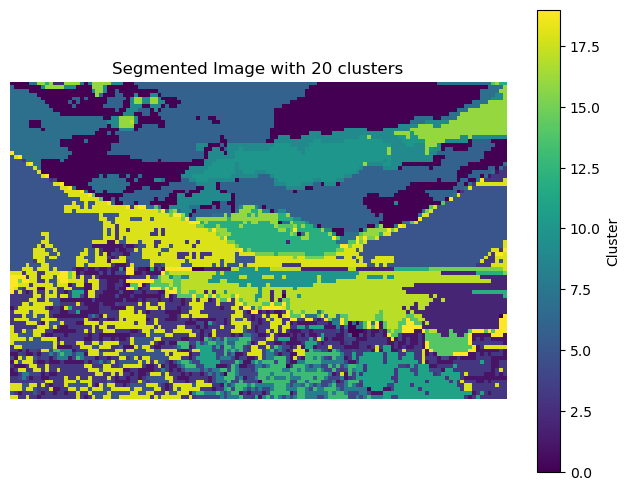

In [12]:
np.unique(labels)
labels_img = np.reshape(labels,(m,n))
plt.figure(figsize=(8, 6))
plt.imshow(labels_img, cmap='viridis')
plt.title('Segmented Image with 20 clusters')
plt.colorbar(label='Cluster')
plt.axis('off')
plt.show()

In [13]:
data_new = img_norm.reshape(-1,3)
data_new.shape

n_clusters = 20
cluster_means = []
for i in range(n_clusters):
    cluster_pixels = data_new[labels == i]
    means = torch.mean(cluster_pixels,dim = 0)
    cluster_means.append(means)
cluster_means

[tensor([0.6552, 0.7155, 0.8421]),
 tensor([0.4338, 0.4587, 0.2720]),
 tensor([0.1560, 0.5604, 0.7250]),
 tensor([0.3349, 0.3509, 0.1875]),
 tensor([0.5752, 0.5247, 0.4113]),
 tensor([0.0963, 0.1027, 0.1191]),
 tensor([0.7905, 0.8291, 0.9180]),
 tensor([0.5390, 0.6025, 0.7318]),
 tensor([0.6746, 0.6094, 0.5252]),
 tensor([0.4936, 0.7120, 0.9402]),
 tensor([0.2635, 0.7000, 0.9701]),
 tensor([0.5403, 0.4204, 0.1874]),
 tensor([0.1721, 0.3996, 0.6809]),
 tensor([0.7806, 0.7127, 0.6320]),
 tensor([0.3430, 0.5779, 0.5871]),
 tensor([0.1419, 0.2873, 0.4440]),
 tensor([0.3137, 0.5468, 0.8532]),
 tensor([0.2592, 0.6702, 0.8274]),
 tensor([0.2007, 0.2144, 0.1657]),
 tensor([0.3064, 0.4613, 0.4431])]

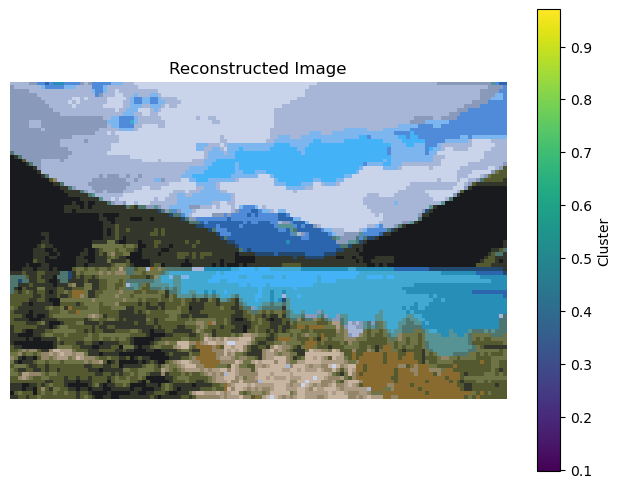

In [14]:
new_image = torch.zeros(data_new.shape)
new_image.shape

for i,rgb_mean in enumerate(cluster_means):
    new_image[np.where(labels == i)] = rgb_mean
new_image.shape
m,n,c = img_norm.shape
reconstructed_image = torch.reshape(new_image,(m,n,c))
reconstructed_image.shape

plt.figure(figsize=(8, 6))
plt.imshow(reconstructed_image, cmap='viridis')
plt.title('Reconstructed Image')
plt.colorbar(label='Cluster')
plt.axis('off')
plt.show()